In [1]:
import pandas
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv('wine.dat', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [6]:
# Set of features
X = np.array([np.array(pandas.Series.tolist(data[i])) for i in data.columns[1:]])
X = X.transpose()
# Set of targets
Y = np.array(pandas.Series.tolist(data[0]))

X = X
Y = Y

Xs = scale(X)

In [7]:
def fit(k, X, Y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kNN = KNeighborsClassifier(n_neighbors=k)
    mark = []
    for train_index, test_index in kf.split(X):
        X_train = [X[i] for i in train_index]
        Y_train = [Y[i] for i in train_index]
        X_test = [X[i] for i in test_index]
        Y_test = [Y[i] for i in test_index]
        kNN.fit(X_train, Y_train)
        mark.append(np.mean(cross_val_score(kNN, X_train, Y_train, cv=kf, scoring='accuracy')))
    return np.mean(mark)

In [8]:
marks = []
marksS = []
for i in np.linspace(1,50,50):
    marks.append(fit(i, X, Y))
    marksS.append(fit(i, Xs, Y))

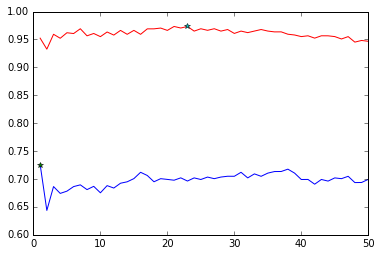

In [9]:
x1 = np.linspace(1,50,50)
y1 = marks
y1_max = max(marks)
x1_max = x1[marks.index(y1_max)]

x2 = np.linspace(1,50,50)
y2 = marksS
y2_max = max(marksS)
x2_max = x2[marksS.index(y2_max)]

plt.plot(x1,y1)
plt.plot(x1_max, y1_max, '*')

plt.plot(x2,y2)
plt.plot(x2_max, y2_max, '*')

plt.show()

In [10]:
x2_max

23.0

In [11]:
y2_max

0.97339901477832513

In [19]:
np.argmax(y2)

22

In [17]:
y2[22]

0.97339901477832513